In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

**Data Generation**

In this example, we will generate syntetic data with random number generator in 2 dimensions for n number of clusters. The data will contain X and Y values in addition to auto generated labels which will be later used to estimate the accuracy of the model. The label generation is not a must but is always good to have since the problem we are working on is unsupervised learning.

In [2]:
# Predefined parameters
num_of_clusters = 6
num_of_data_in_each_cluster = 50
overlap_region = 0

# temporary values which will be deleted later.  
data = np.array([[0, 0]], np.int32)
label = np.array([0], np.int32)

for k in range(0,num_of_clusters):
  if k == 0:
    lower_limit = k*100
  else:
    lower_limit = upper_limit-overlap_region

  upper_limit = (k+2)*100

# data generation
  d = [[random.randint(lower_limit,upper_limit) for i in range(2)] for j in range(num_of_data_in_each_cluster)]
  # print(k+1, len(d),(lower_limit, upper_limit), d)
  data = np.append(data, d, axis=0)
#  label generation
  l = [(k+1) for i in range(num_of_data_in_each_cluster)]
  # print(l)
  label = np.append(label, l, axis = 0)


del d, l
data  = np.delete(data,0, 0)
label = np.delete(label,0,0)

print(f"Total number of data : {len(data)}")
print(f"Total number of labels : {len(label)}")


Total number of data : 300
Total number of labels : 300


Statistics about the data

In [3]:
# To get the statistics about the data
pd.DataFrame(data).describe()

,0,1
count,300.000000,300.000000
mean,393.913333,393.876667
std,184.650549,187.175793
min,1.000000,0.000000
25%,266.750000,254.500000
50%,400.000000,399.500000
75%,557.000000,550.000000
max,697.000000,699.000000


In [4]:
scaler = StandardScaler()
data_s = scaler.fit_transform(data)

#  checking the statistics about the scaled data.
pd.DataFrame(data_s).describe()


,0,1
count,3.000000e+02,3.000000e+02
mean,-2.827368e-16,-1.909584e-16
std,1.001671e+00,1.001671e+00
min,-2.131431e+00,-2.107830e+00
25%,-6.898209e-01,-7.458739e-01
50%,3.301824e-02,3.009326e-02
75%,8.846936e-01,8.354937e-01
max,1.644149e+00,1.632867e+00


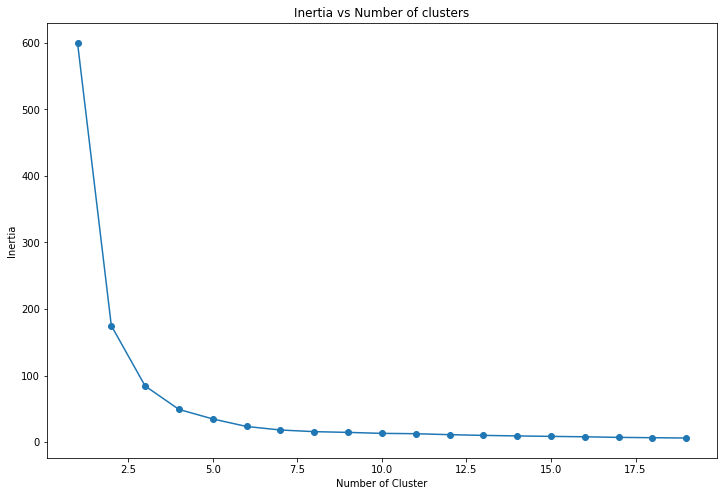

In [5]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
  kmeans_model = KMeans(n_jobs=-1, n_clusters=cluster, init='k-means++', max_iter =1000)
  kmeans_model.fit(data_s)
  # print(cluster, kmeans_model.inertia_)
  SSE.append(kmeans_model.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,8))
plt.plot(frame.Cluster, frame.SSE, marker = 'o')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of clusters');

In [6]:
def evaluation(actual_labels, predicted_labels, features_used):
  '''
  prints out the metrics after the prediction.
  '''
  print()  
  # Homogeneity and completeness are inversely related. Each lies between 0 and 1
  # Homogeneity : Each cluster should contain members of the same class
  print(f'Homogeneity_score :{metrics.homogeneity_score(actual_labels, predicted_labels)}')
  # Completeness: All members of a class should lie in the same cluster
  print(f"Completeness_score :{metrics.completeness_score(actual_labels, predicted_labels)}")
  # v_measure : Harmonic mean of homogeneity and completeness
  print(f"v_measure_score :{metrics.v_measure_score(actual_labels, predicted_labels)}")  
  # Adjusted_rand_score: Measure of similarity between labels and assigned clusters
  print(f"Adjusted_rand_score :{metrics.adjusted_rand_score(actual_labels, predicted_labels)}")  
  # Adjusted_mutual_info_score: Measures mutual information in overlap between cluster assignments
  print(f"Adjusted_mutual_info_score :{metrics.adjusted_mutual_info_score(actual_labels, predicted_labels)}")  
  print()
  print(f"Silhouette_score :{metrics.silhouette_score(features_used, predicted_labels)}")

In [7]:
def build_model_plot_results(data, label, scaler, clusters ):

  data_scaled= scaler.fit_transform(data)
  model = KMeans(n_jobs = -1, n_clusters = clusters, init='k-means++', max_iter=1000)
  model.fit_transform(data_scaled)

  # predictions = model.labels_
  predictions = model.predict(data_scaled)
  centroids = scaler.inverse_transform(model.cluster_centers_)


  colors = ['green','black','red', 'blue', 'purple', 'magenta', 'orange', 'yellow', 'royalblue', 'brown']

  fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16,10))
  fig.subplots_adjust(top=0.85)

  ax0.set_title('Original data',fontsize=11)
  ax0.set_ylim(auto=True)
  ax0.scatter(data[:,0], data[:,1], c= label, s=50, cmap=matplotlib.colors.ListedColormap(colors[0:len(np.unique(label))]));

  ax1.set_title('Prediction results',fontsize=11)
  ax1.scatter(data[:,0], data[:,1], c= predictions, s=25, cmap=matplotlib.colors.ListedColormap(colors[0:len(model.cluster_centers_)]))
  ax1.scatter(centroids[:,0], centroids[:,1], c = 'aqua', s= 250, marker='o')

  for i in range(len(centroids)):
    ax1.annotate(i, (centroids[i][0]-5, centroids[i][1]+15), fontsize = 20)
  
  fig.tight_layout()
  plt.show()

  evaluation(label, predictions, data_scaled)

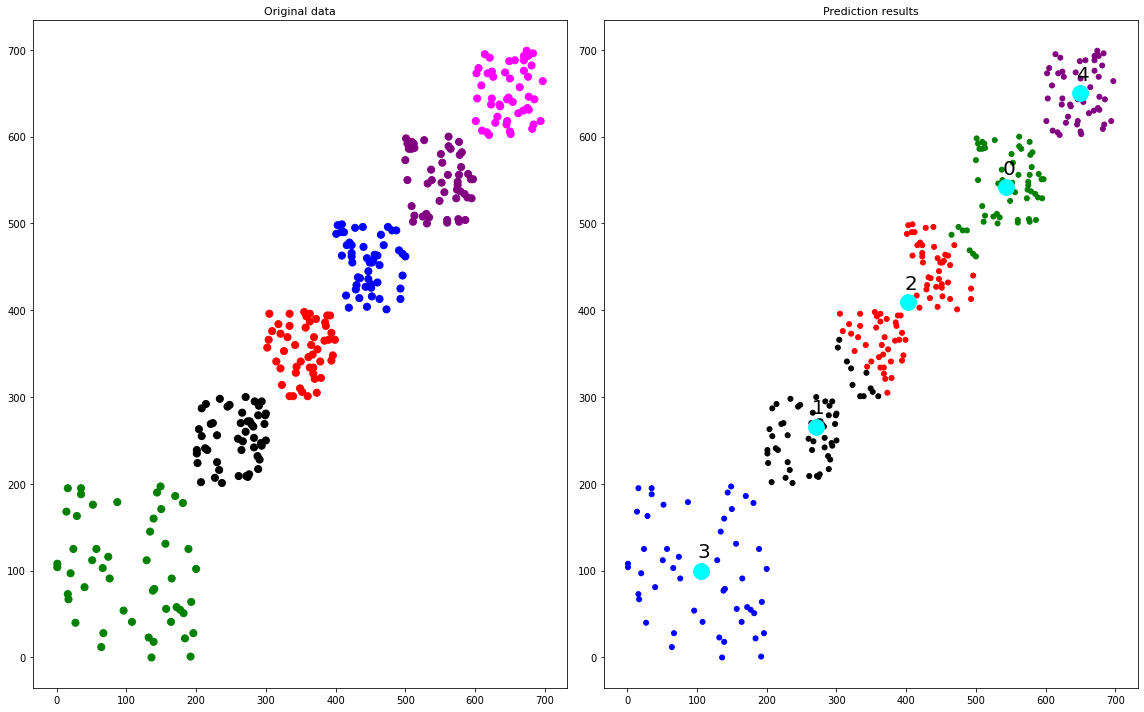


Homogeneity_score :0.8013922825963148
Completeness_score :0.9023940864223476
v_measure_score :0.8488994510925096
Adjusted_rand_score :0.755627128052242
Adjusted_mutual_info_score :0.8457799048700144

Silhouette_score :0.5111336543748619


In [8]:
build_model_plot_results(data, label, scaler, 5)

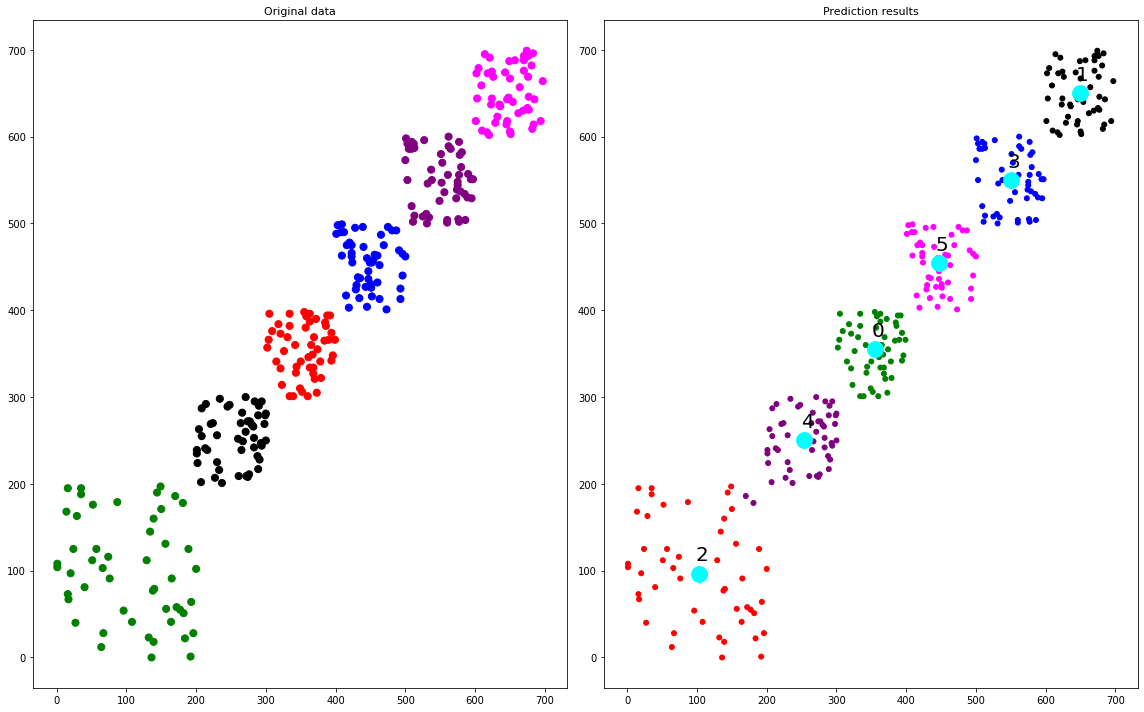


Homogeneity_score :0.9842292285333751
Completeness_score :0.9843757717805078
v_measure_score :0.984302494702591
Adjusted_rand_score :0.9840568213103854
Adjusted_mutual_info_score :0.9839171232521843

Silhouette_score :0.5596928883890591


In [9]:
build_model_plot_results(data, label, scaler, 6)

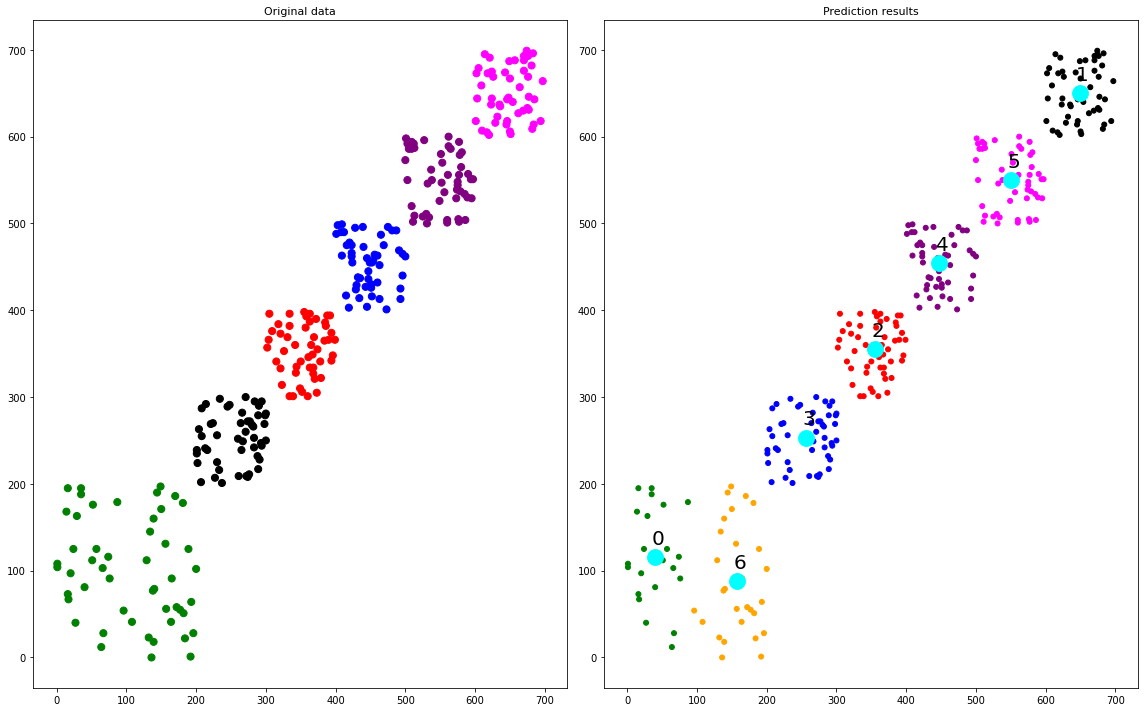


Homogeneity_score :1.0000000000000002
Completeness_score :0.9400226815011978
v_measure_score :0.9690842178956427
Adjusted_rand_score :0.9481344813448135
Adjusted_mutual_info_score :0.968186832534585

Silhouette_score :0.5501721860700464


In [10]:
build_model_plot_results(data, label, scaler, 7)

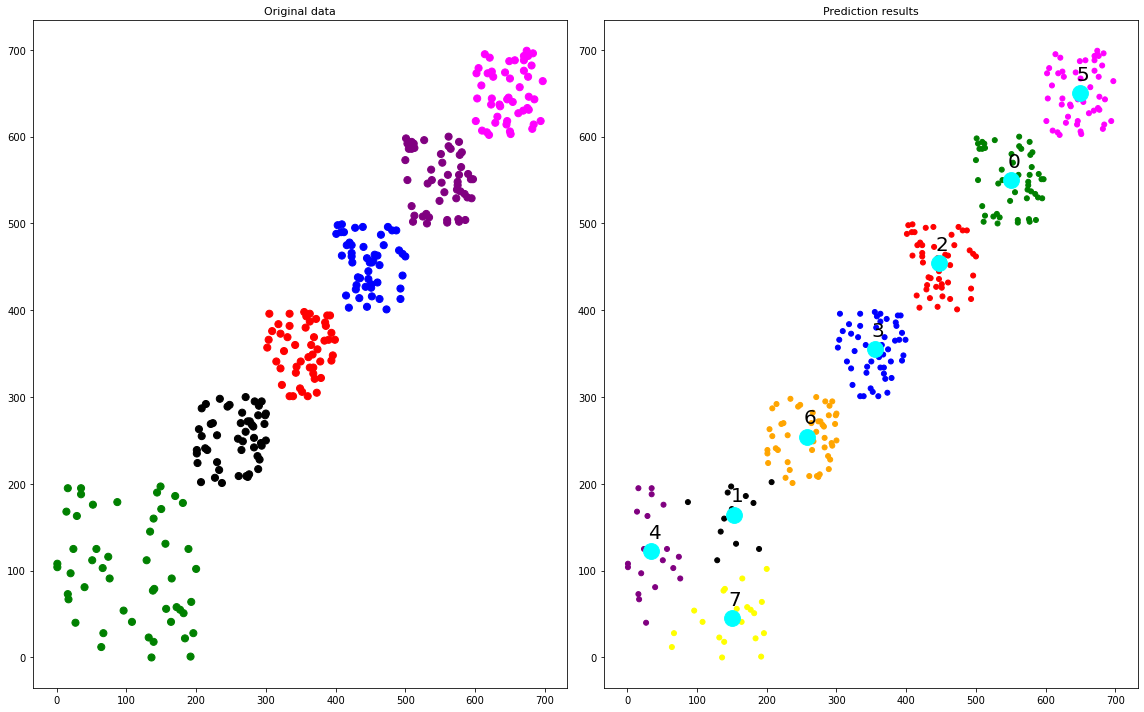


Homogeneity_score :0.9935965515911636
Completeness_score :0.9016342216408892
v_measure_score :0.9453842414042323
Adjusted_rand_score :0.9258632491362444
Adjusted_mutual_info_score :0.9435152626220659

Silhouette_score :0.5446901302560889


In [11]:
build_model_plot_results(data, label, scaler, 8)

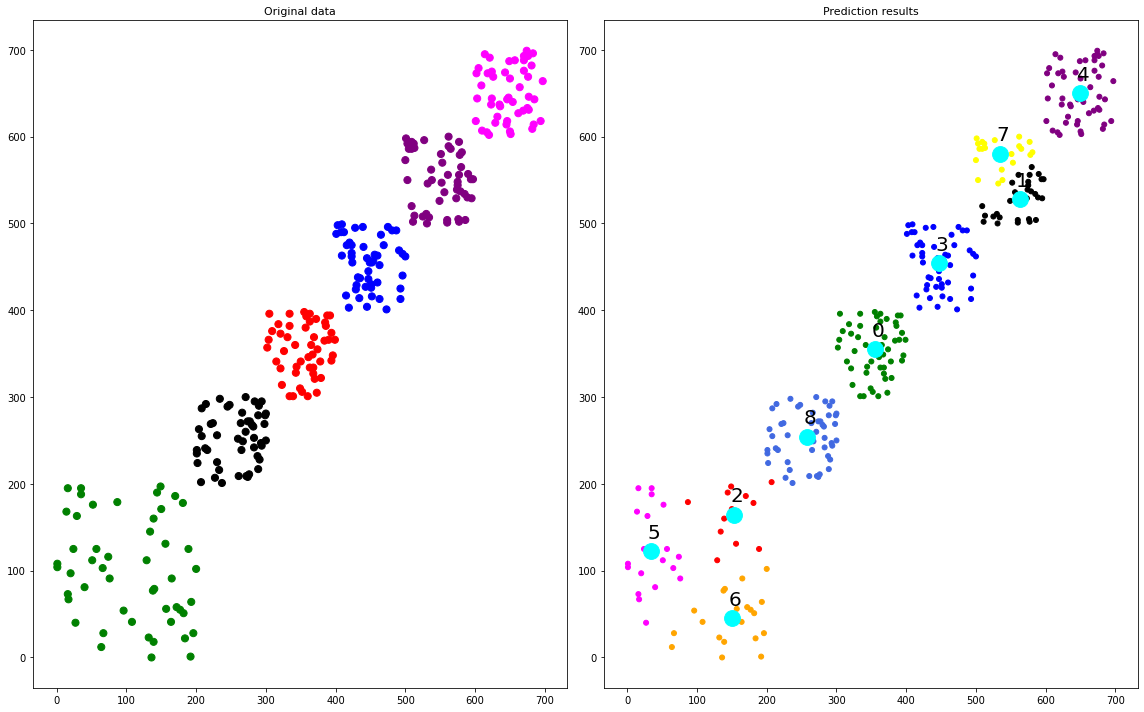


Homogeneity_score :0.9935965515911636
Completeness_score :0.8526714026095421
v_measure_score :0.9177555872598353
Adjusted_rand_score :0.8693444546149061
Adjusted_mutual_info_score :0.914605496774468

Silhouette_score :0.5135647838564


In [12]:
build_model_plot_results(data, label, scaler, 9)